In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from plotting_constants import nice_names, color_dict, stack_to_ax

idx = pd.IndexSlice

In [36]:
results = pd.read_csv(
    Path.cwd().parent /
    'summaries' /
    'total_summary.csv',
    index_col=[0,1],
    parse_dates=True
    )

model_balancing_volume = results.loc[results.index.get_level_values(1) == 'balancing_volume']
results = results.loc[~(results.index.get_level_values(1) == 'balancing_volume')]

In [16]:
bmus = pd.read_csv(Path.cwd().parent / 'data' / 'bmus_prepared.csv', index_col=0)

In [19]:
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

all_bids = []

for day in tqdm(sorted(balancing_volume.index.get_level_values(0).strftime('%Y-%m-%d').unique())):
    
    try:
        bids = pd.read_csv(Path.cwd().parent / 'data' / 'base' / f'{day}' / 'bids.csv', index_col=[0,1], parse_dates=True)
    except FileNotFoundError:
        continue

    all_bids.append(bids)

all_bids = pd.concat(all_bids)

100%|██████████| 1084/1084 [00:11<00:00, 93.87it/s] 


In [74]:
idx = pd.IndexSlice

real_bid_vol = all_bids.loc[
    # idx[:,'vol'],
    idx['2022-11','vol'],
    all_bids.columns.intersection(
        bmus
        .index[bmus.carrier.isin(['onwind', 'offwind', 'cascade', 'ror', 'PHS', 'fossil'])]
        )
    # :
].sum(axis=1)


# real_bid_vol.index = real_bid_vol.index.droplevel(1)
# real_bid_vol = real_bid_vol.groupby(real_bid_vol.index.strftime('%Y-%m')).sum().mul(1e-3)
real_bid_vol = real_bid_vol.groupby(real_bid_vol.index.strftime('%Y-%m-%d')).sum().mul(1e-3)

In [70]:
mmb = (
    model_balancing_volume.loc['2022-11', 'national']
    .groupby(
        model_balancing_volume.loc['2022-11']
        .index
        .get_level_values(0)
        # .strftime('%Y-%m')
        .strftime('%Y-%m-%d')
    ).sum()
    .mul(1e3)
)

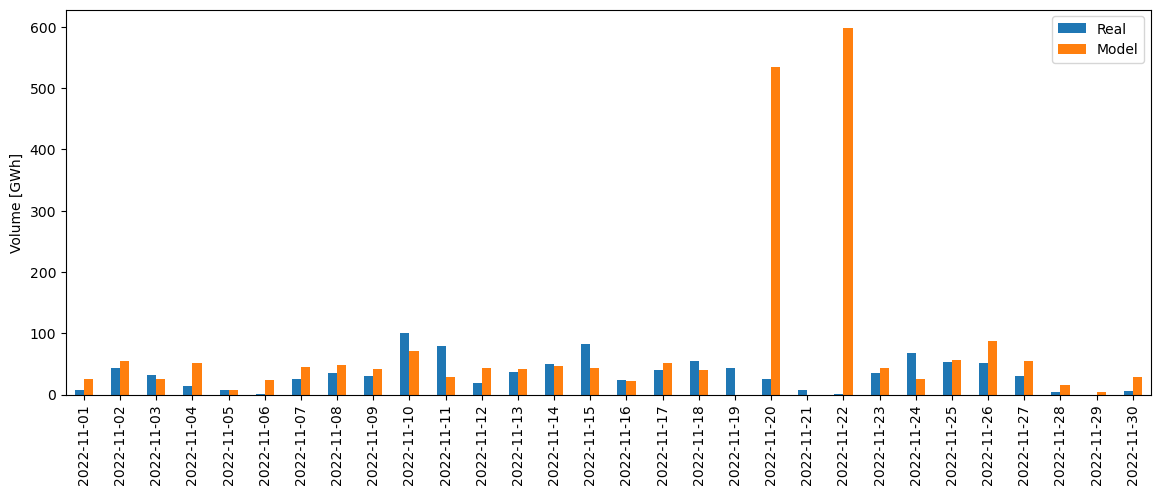

In [75]:
fig, ax = plt.subplots(figsize=(14, 5))

# real_bid_vol.plot.bar(ax=ax)
# mmb.plot.bar(ax=ax, color='red')

plotdata = pd.concat([real_bid_vol, mmb], axis=1)
plotdata.columns = ['Real', 'Model']

plotdata.plot.bar(ax=ax)
ax.set_ylabel('Volume [GWh]')

plt.show()

In [77]:
print('real congestion management bids: ', int(real_bid_vol.drop(index=['2022-11-20', '2022-11-22']).sum().sum()), 'GWh')
print('model congestion management bids: ', int(mmb.drop(index=['2022-11-20', '2022-11-22']).sum()), 'GWh')

real congestion management bids:  980 GWh
model congestion management bids:  1026 GWh


In [21]:
all_bids

FASN-1  FASN2  LCSMH-1  CLDCW-1  CLDNW-1  \
2022-01-01 00:00:00+00:00 vol      6.50   6.50     6.60      NaN      NaN   
                          price   17.13  17.13    58.95      NaN      NaN   
2022-01-01 00:30:00+00:00 vol      6.50   6.50     7.50      NaN      NaN   
                          price   17.13  17.13    58.95      NaN      NaN   
2022-01-01 01:00:00+00:00 vol      6.50   6.50     7.50      NaN      NaN   
...                                 ...    ...      ...      ...      ...   
2024-12-31 22:30:00+00:00 price     NaN    NaN      NaN      NaN      NaN   
2024-12-31 23:00:00+00:00 vol       NaN    NaN      NaN      NaN      NaN   
                          price     NaN    NaN      NaN      NaN      NaN   
2024-12-31 23:30:00+00:00 vol       NaN    NaN      NaN      NaN      NaN   
                          price     NaN    NaN      NaN      NaN      NaN   

                                 CLDSW-1  CRUA-2  FOYE-1    KLGLW-1  MOWEO-2  \
2022-01-01 00:00:00+00:00 vol        NaN     NaN     NaN        NaN      NaN   
                          price      NaN     NaN     NaN        NaN      NaN   
2022-01-01 00:30:00+00:00 vol        NaN     NaN     NaN        NaN      NaN   
                          price      NaN     NaN     NaN        NaN      NaN   
2022-01-01 01:00:00+00:00 vol        NaN     NaN     NaN        NaN      NaN   
...                                  ...     ...     ...        ...      ...   
2024-12-31 22:30:00+00:00 price      NaN     NaN     NaN  95.190000   123.14   
2024-12-31 23:00:00+00:00 vol        NaN     NaN     NaN  53.033333      NaN   
                          price      NaN     NaN     NaN  95.190000      NaN   
2024-12-31 23:30:00+00:00 vol        NaN     NaN     NaN        NaN      NaN   
                          price      NaN     NaN     NaN        NaN      NaN   

                                 ...  AG-HSTK06  BROCW-1  FBPG02  AG-NFLX09  \
2022-01-01 00:00:00+00:00 vol    ...        NaN      NaN     NaN        NaN   
                          price  ...        NaN      NaN     NaN        NaN   
2022-01-01 00:30:00+00:00 vol    ...        NaN      NaN     NaN        NaN   
                          price  ...        NaN      NaN     NaN        NaN   
2022-01-01 01:00:00+00:00 vol    ...        NaN      NaN     NaN        NaN   
...                              ...        ...      ...     ...        ...   
2024-12-31 22:30:00+00:00 price  ...        NaN     10.5     NaN        NaN   
2024-12-31 23:00:00+00:00 vol    ...        NaN     19.0   1.425        NaN   
                          price  ...        NaN     10.5  59.510        NaN   
2024-12-31 23:30:00+00:00 vol    ...        NaN     19.0   4.425   0.958333   
                          price  ...        NaN     10.5  67.240  78.000000   

                                 WBURB-43  AG-GSTK16  MOWWO-1  MOWWO-2  \
2022-01-01 00:00:00+00:00 vol         NaN        NaN      NaN      NaN   
                          price       NaN        NaN      NaN      NaN   
2022-01-01 00:30:00+00:00 vol         NaN        NaN      NaN      NaN   
                          price       NaN        NaN      NaN      NaN   
2022-01-01 01:00:00+00:00 vol         NaN        NaN      NaN      NaN   
...                                   ...        ...      ...      ...   
2024-12-31 22:30:00+00:00 price       NaN        NaN      NaN      NaN   
2024-12-31 23:00:00+00:00 vol         NaN        NaN      NaN      NaN   
                          price       NaN        NaN      NaN      NaN   
2024-12-31 23:30:00+00:00 vol         NaN        NaN      NaN      NaN   
                          price       NaN        NaN      NaN      NaN   

                                 MOWWO-3  AG-GFLX04  
2022-01-01 00:00:00+00:00 vol        NaN        NaN  
                          price      NaN        NaN  
2022-01-01 00:30:00+00:00 vol        NaN        NaN  
                          price      NaN        NaN  
2022-01-01 01:00:00+00:00 vol        Na

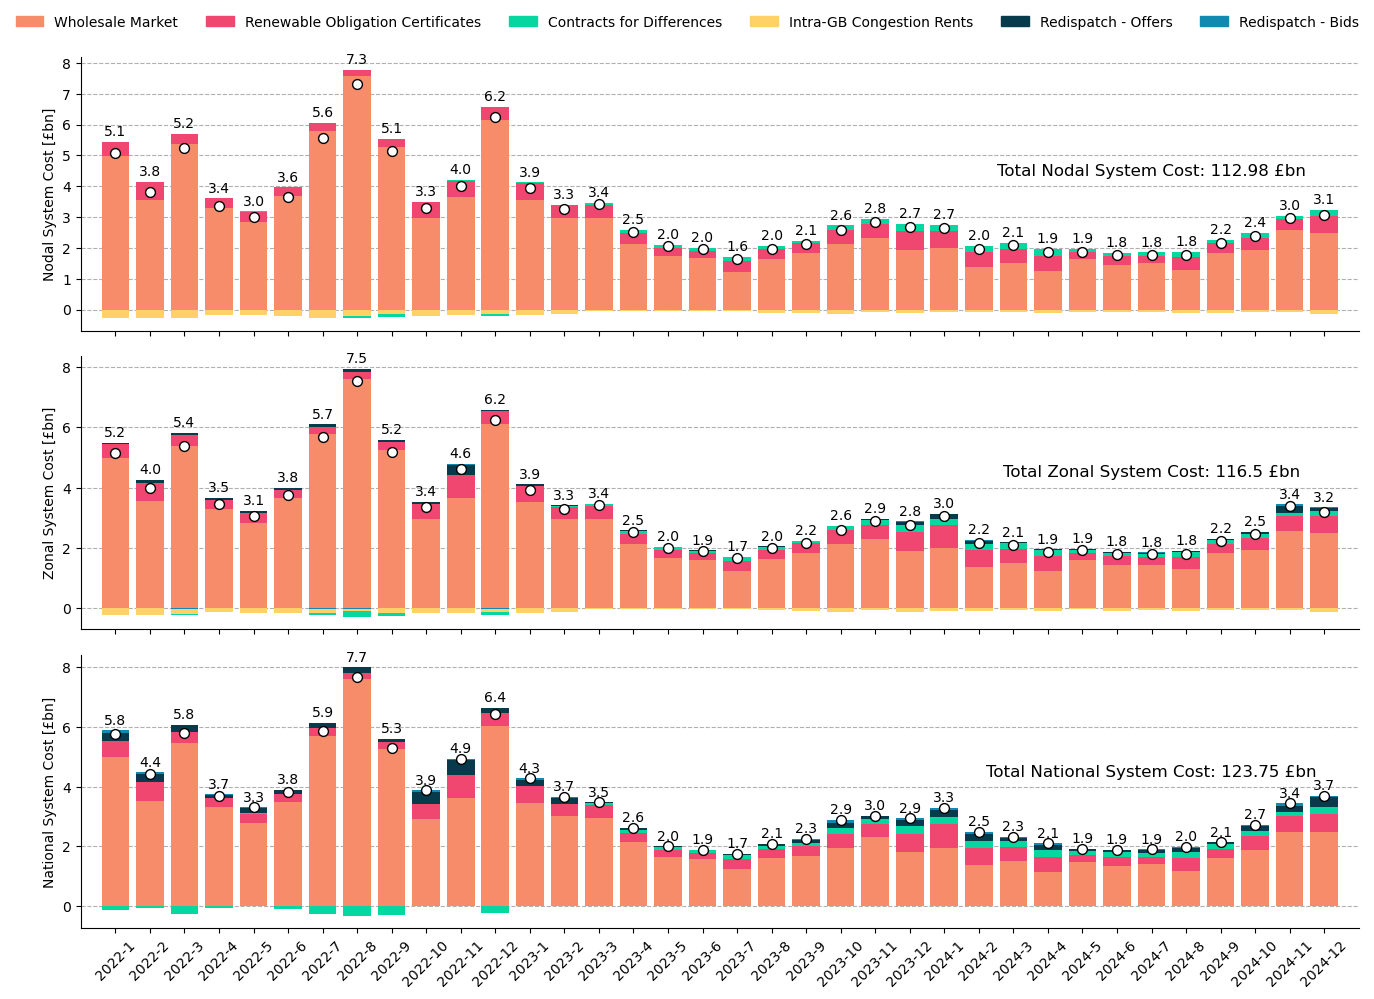

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for col, ax in zip(results.columns, axs):

    ts = results.index.get_level_values(0).unique()

    df_unstack = results.loc[idx[:, :], col].unstack()
    df = df_unstack.groupby([df_unstack.index.year, df_unstack.index.month]).sum().mul(1e-3)

    for m in df.index:
        # stack_to_ax(total_costs, df.loc[[m]], ax)
        stack_to_ax(df.loc[[m]], ax)

    ax.set_ylabel(f'{col.capitalize()} System Cost [£bn]')
    ax.grid(axis='y', linestyle='--')
    ax.set_axisbelow(True)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_xlim(-1, len(df))

    total_cost = df.sum().sum()
    ax.text(
        len(df) - 6, 4.5,
        f'Total {col.capitalize()} System Cost: {np.around(total_cost, decimals=2)} £bn',
        ha='center',
        va='center',
        fontsize=12,
        # transform=ax.transAxes
    )

axs[2].tick_params(axis='x', labelrotation=45)

handles, labels = [], []

for name, nice_name in nice_names.items():
    handles.append(plt.Rectangle((0, 0), 1, 1, color=color_dict[name]))
    labels.append(nice_name)

axs[0].legend(
    handles,
    labels,
    # title='Cost Factors',
    bbox_to_anchor=(1.01, 1.2),
    frameon=False,
    ncol=6
    )

plt.tight_layout()
plt.show()

In [6]:
nquants = len(results.index.get_level_values(1).unique())

total_date_range = pd.date_range(
    results.index.get_level_values(0).min().strftime('%Y-%m'),
    results.index.get_level_values(0).max().strftime('%Y-%m'),
    freq='ME').strftime('%Y-%m')

total_hh = pd.date_range(
    results.index.get_level_values(0).min().strftime('%Y-%m-%d'),
    results.index.get_level_values(0).max().strftime('%Y-%m-%d'),
    freq='30min')

missing_share = pd.Series(np.nan, total_date_range)

for m in total_date_range:

    n_modelled = len(results.loc[idx[m, :], :]) / nquants
    n_total = pd.date_range(m, pd.Timestamp(m) + pd.offsets.MonthEnd(1), freq='30min')

    missing_share[m] = 1 - n_modelled / len(n_total)